# Importing Libraries.

In [95]:
#Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Data Exploration

In [96]:
df = pd.read_csv("Mall_Customers.csv")

In [97]:
print(df.head(10))  

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [98]:
print(df.info(5)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [99]:
print(df.shape)

(200, 5)


In [100]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [101]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [102]:
print(df.isnull().mean())

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


# Building the Model

# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

In [103]:
X = df[['Age', 'Spending Score (1-100)']].values

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

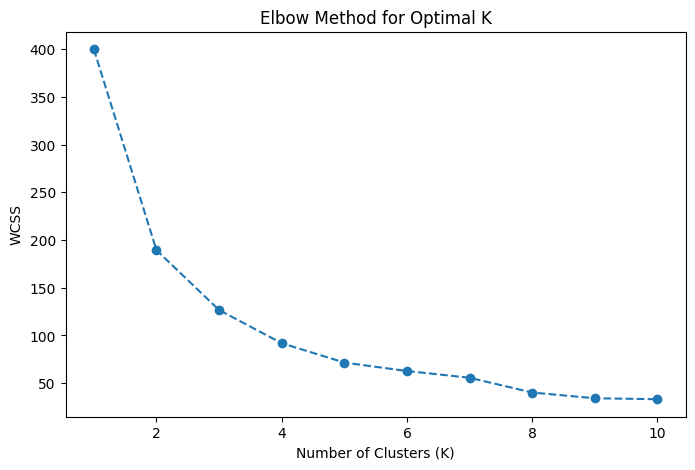

In [106]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [107]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'For K = {k}, Silhouette Score = {score:.4f}')

For K = 2, Silhouette Score = 0.4721
For K = 3, Silhouette Score = 0.4314
For K = 4, Silhouette Score = 0.4145
For K = 5, Silhouette Score = 0.4103
For K = 6, Silhouette Score = 0.4187
For K = 7, Silhouette Score = 0.3782
For K = 8, Silhouette Score = 0.3998
For K = 9, Silhouette Score = 0.4086
For K = 10, Silhouette Score = 0.3583


In [108]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [109]:
df['Cluster'] = clusters

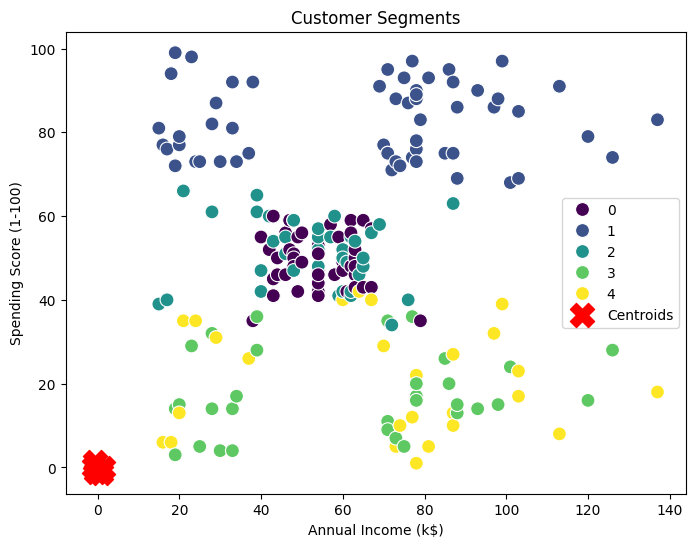

In [110]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

# Histograms

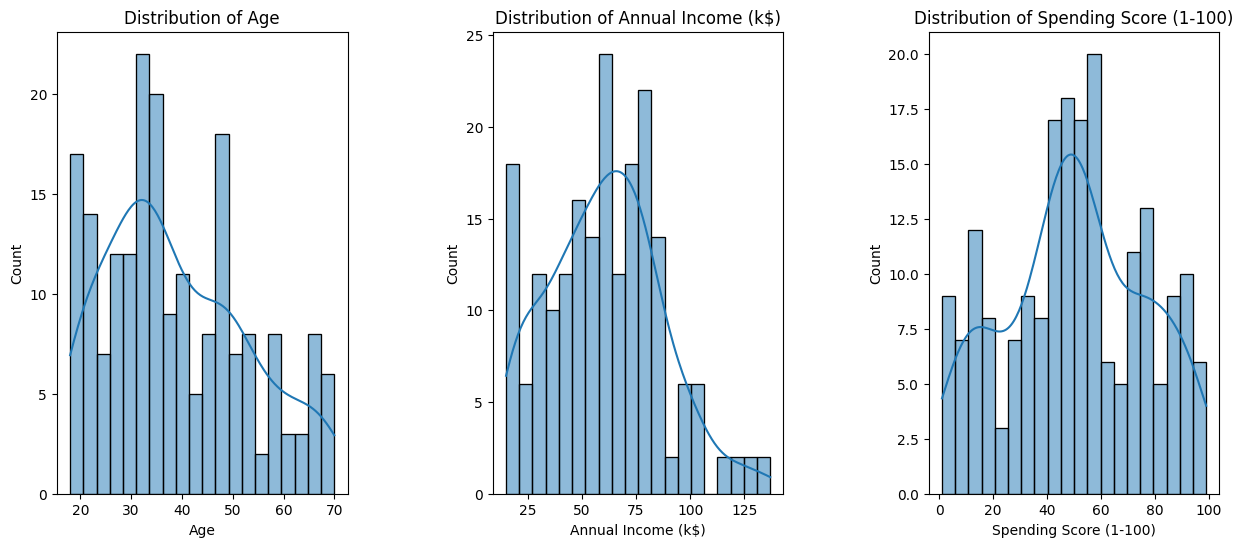

In [111]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  
    plt.title(f'Distribution of {x}')
plt.show()

 # Count Plot of Gender

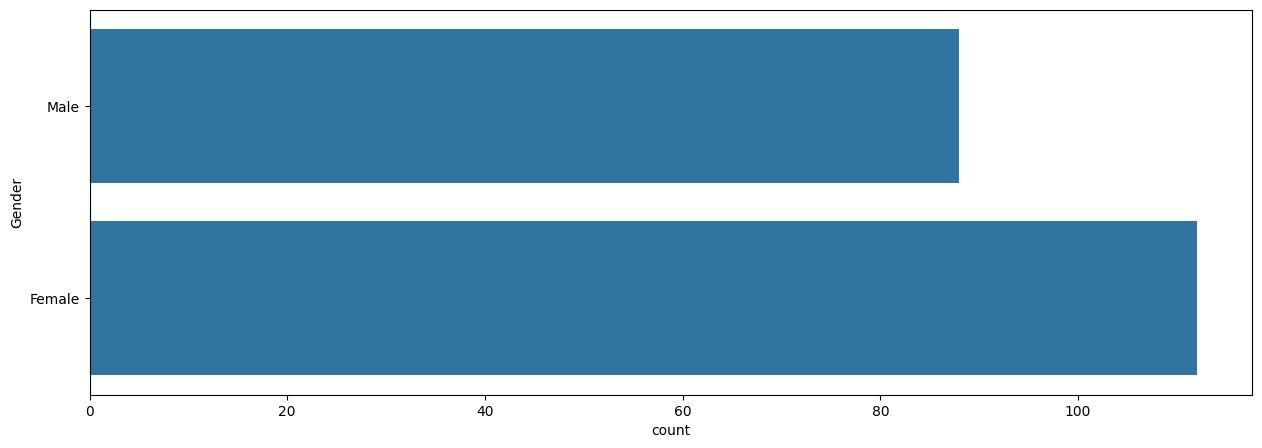

In [112]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

# Ploting the Relation between Age , Annual Income and Spending Score

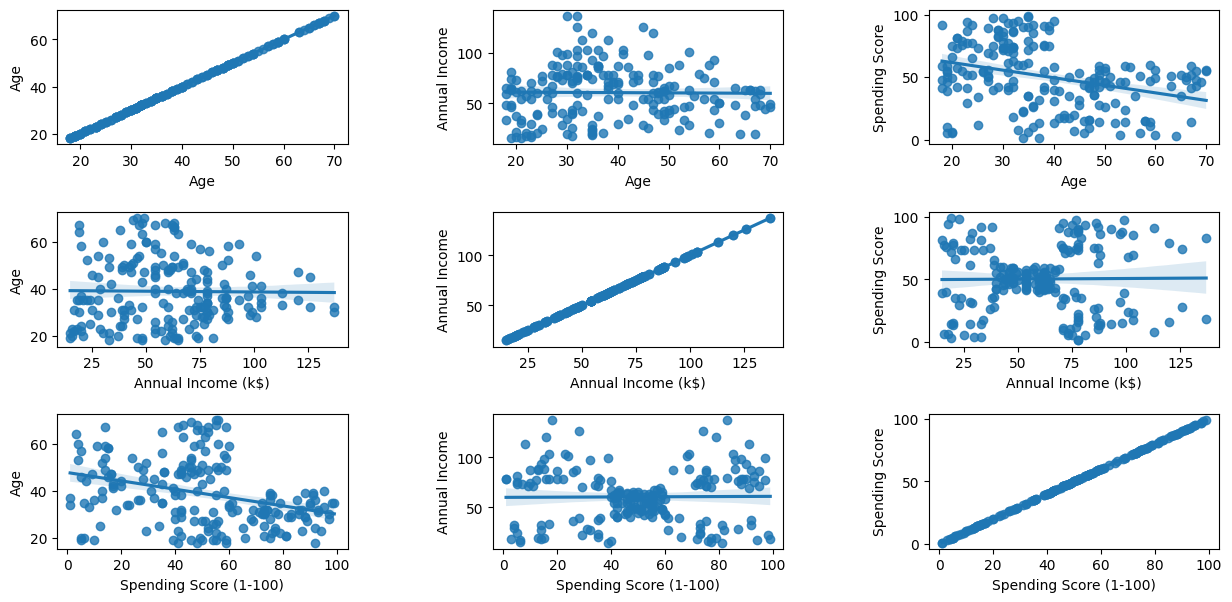

In [113]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

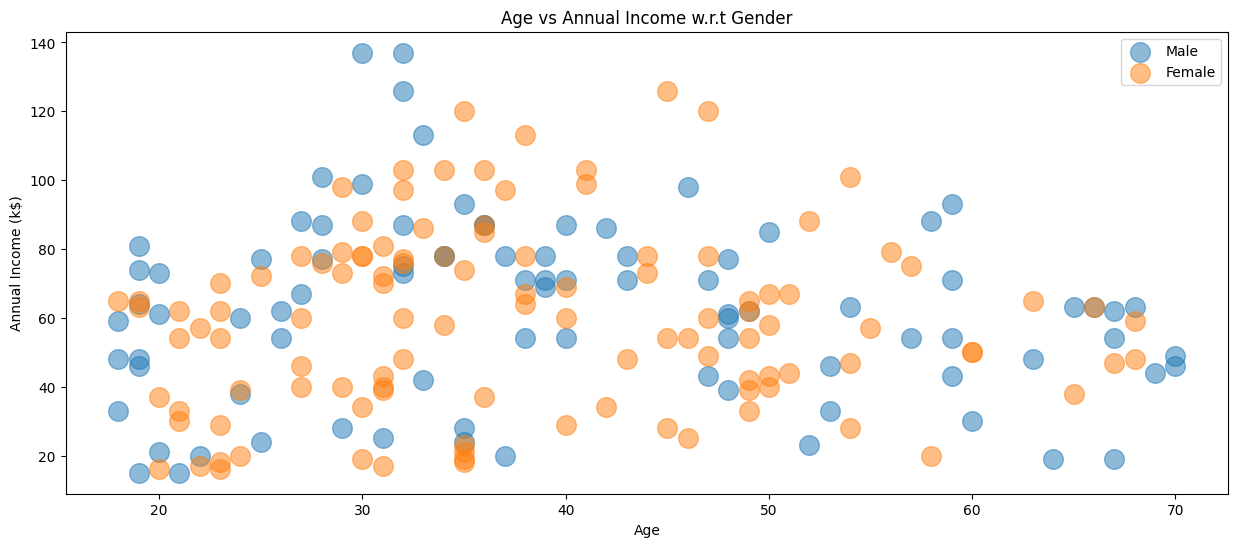

In [114]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

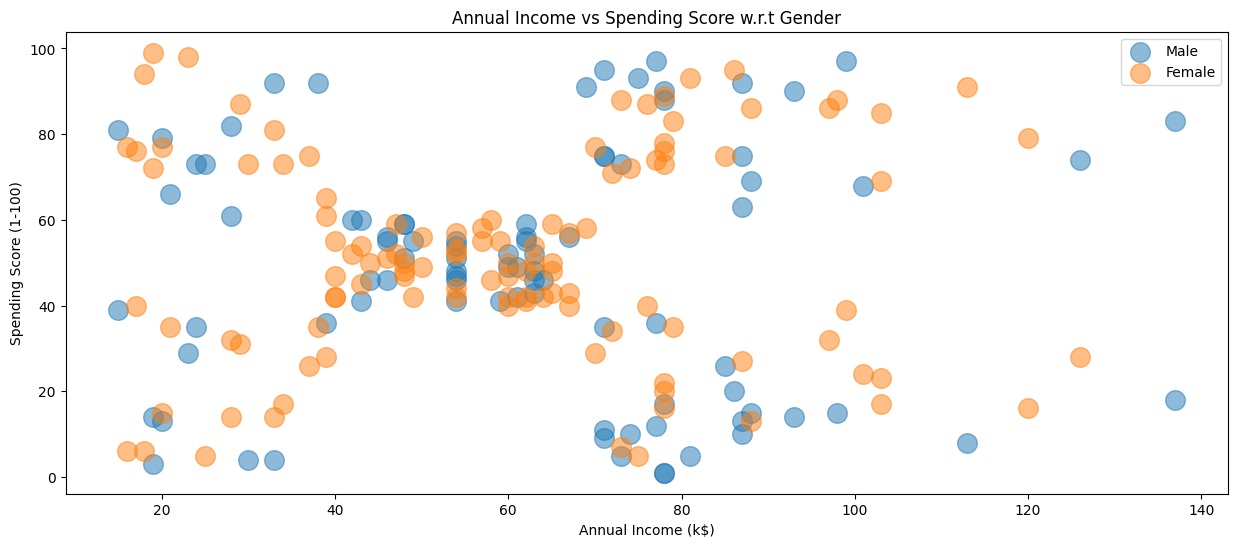

In [115]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

# Distribution of values in Age , Annual Income and Spending Score according to Gender

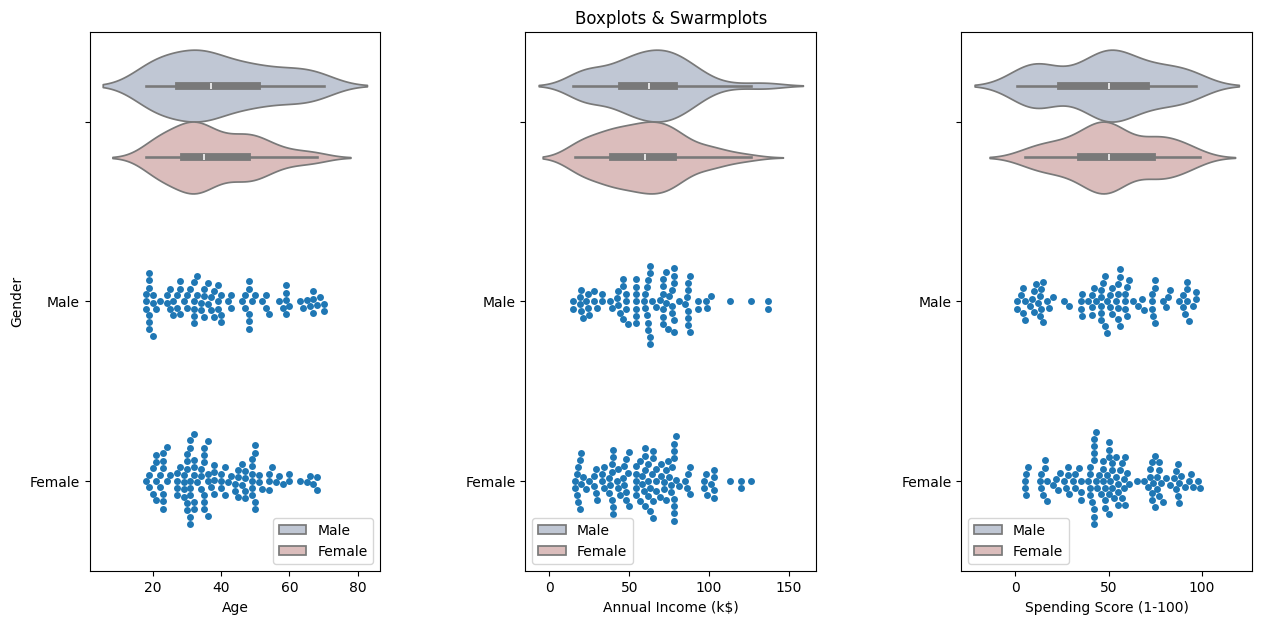

In [116]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x=cols, hue='Gender', data=df, palette='vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Clustering using K- means

In [117]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []

for n in range(1, 11):
    # Use the 'elkan' algorithm for n > 1 and 'lloyd' for n == 1
    algorithm = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan' if n > 1 else 'lloyd'
    )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

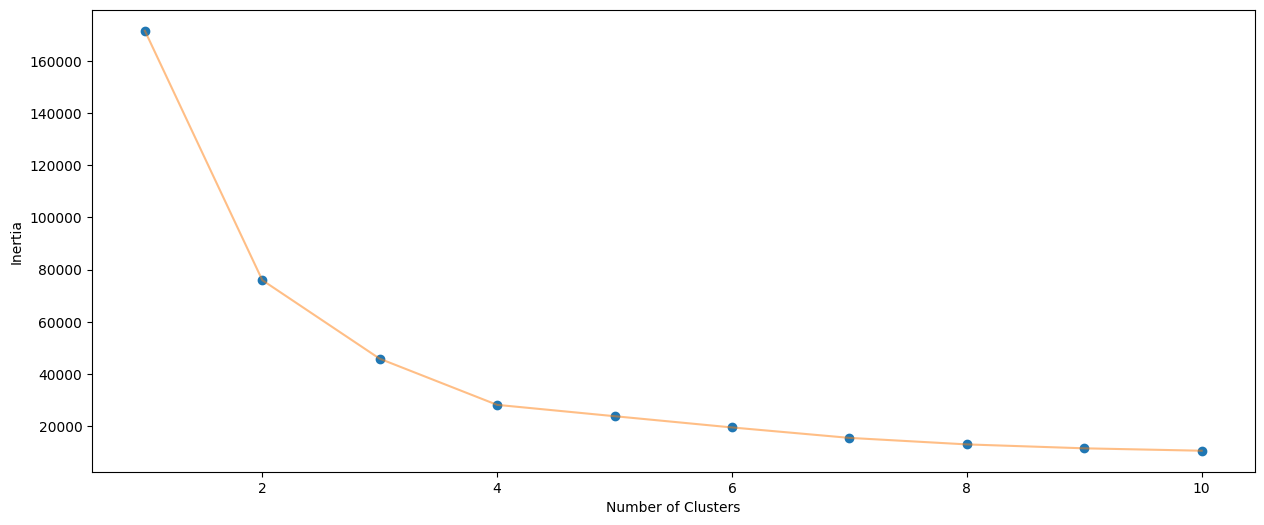

In [118]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [119]:
algorithm = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X1)

KMeans(algorithm='elkan', n_clusters=4, n_init=10, random_state=111)

In [120]:
labels1 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [121]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

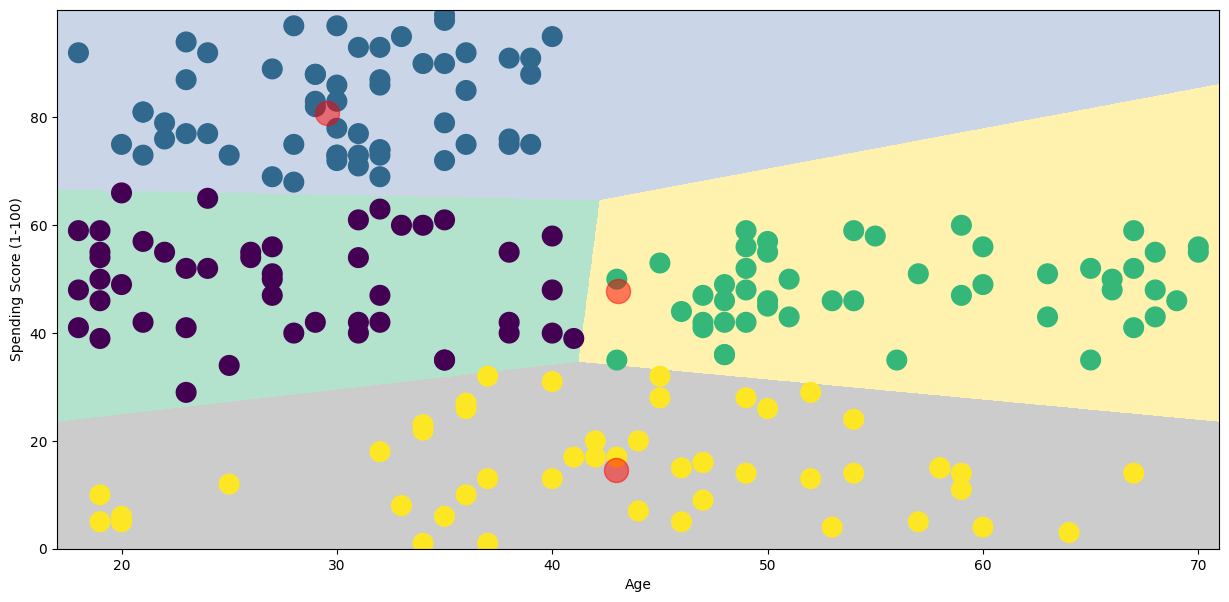

In [122]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(df['Age'], df['Spending Score (1-100)'], c=labels1, s=200)

plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

In [123]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []

for n in range(1, 11):
    # Use 'elkan' for n > 1 and 'lloyd' for n == 1
    algorithm = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan' if n > 1 else 'lloyd'
    )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

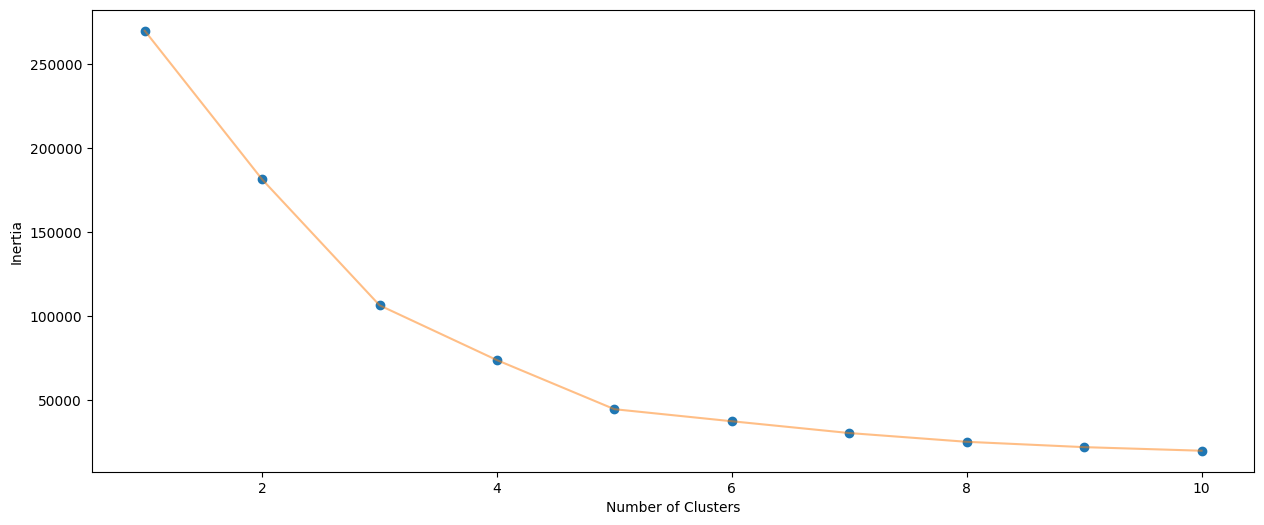

In [124]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [125]:
algorithm = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X2)

KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=111)

In [126]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [127]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

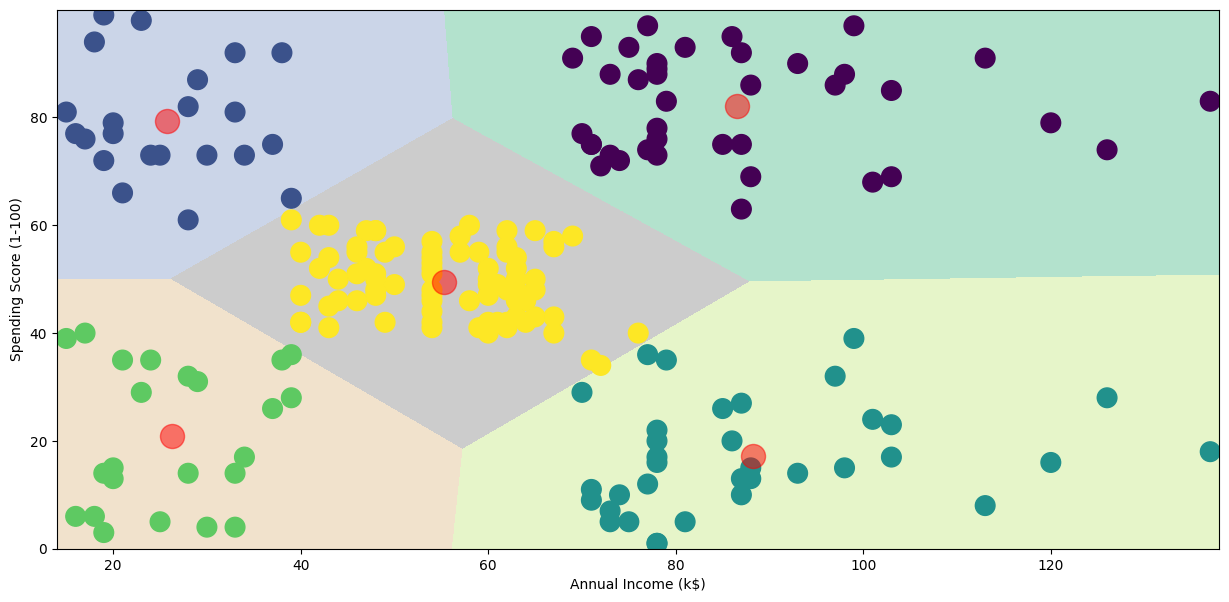

In [128]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)

plt.imshow(Z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels2, s=200)

plt.scatter(centroids2[:, 0], centroids2[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [129]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []

for n in range(1, 11):
    # Use 'elkan' for n > 1 and 'lloyd' for n == 1
    algorithm = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan' if n > 1 else 'lloyd'
    )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

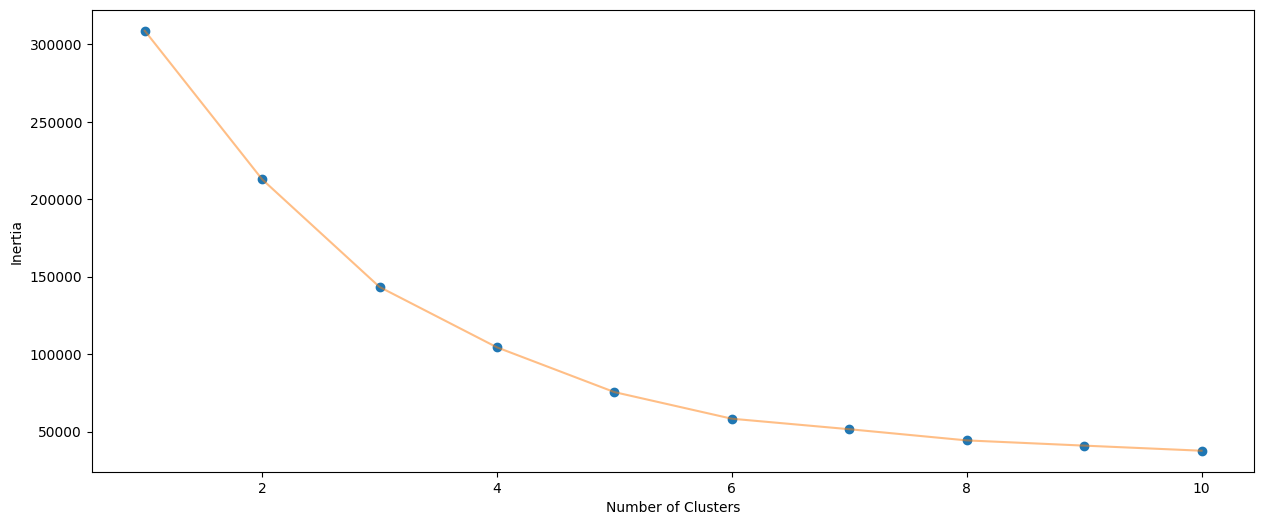

In [130]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [131]:
algorithm = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X3)

KMeans(algorithm='elkan', n_clusters=6, n_init=10, random_state=111)

In [132]:
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [136]:
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'], 
        colorscale='Jet',  
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)

data = [trace1]

layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age', range=[df['Age'].min(), df['Age'].max()]),
        yaxis=dict(title='Spending Score', range=[df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max()]),
        zaxis=dict(title='Annual Income', range=[df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()])
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


# Feature Selection For The Model
Annual income and Spending Score

In [137]:
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  label3  
0        2       1  
1        1       0  
2        4       2  
3        1       0  
4        2       1  
5        1       0  
6        4       2  
7        1       

In [138]:
X= df.iloc[:, [3,4]].values